In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
import numpy as np

/mnt/c/Users/tas12/Documents/Projects/BracketProject/bracketenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/c/Users/tas12/Documents/Projects/BracketProject/bracketenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/c/Users/tas12/Documents/Projects/BracketProject/bracketenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

In [2]:
data = pd.read_csv('PredictionData.csv')
data['Conference_team_one'] = data['Conference_team_one'].astype('category')
data['Conference_team_two'] = data['Conference_team_two'].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [3]:
labels = np.array(data['result'])

In [4]:
data = data.drop(columns=['result'])

In [5]:
data.head()

,Seed_team_one,Team_team_one,Conference_team_one,AdjEM_team_one,AdjO_team_one,AdjD_team_one,AdjT_team_one,Luck_team_one,Opp AdjEM_team_one,OppO_team_one,...,pts_per_g_16_team_two,stl_per_g_15_team_two,stl_per_g_16_team_two,tov_per_g_15_team_two,tov_per_g_16_team_two,trb_per_g_15_team_two,trb_per_g_16_team_two,weight_15_team_two,weight_16_team_two,year_team_two
0,1,Maryland,1,29.25,119.2,89.9,73.7,0.025,9.88,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002
1,1,Maryland,1,29.25,119.2,89.9,73.7,0.025,9.88,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002
2,1,Maryland,1,29.25,119.2,89.9,73.7,0.025,9.88,109.1,...,0.0,0.0,0.0,0.3,0.0,0.3,0.0,180.0,0.0,2002
3,1,Maryland,1,29.25,119.2,89.9,73.7,0.025,9.88,109.1,...,0.0,0.0,0.0,0.0,0.0,0.3,0.0,175.0,150.0,2002
4,1,Maryland,1,29.25,119.2,89.9,73.7,0.025,9.88,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002


In [6]:
cols_to_drop = ['Team_team_one', 'Team_team_two', 'year_team_one', 'year_team_two']
data_np = data.drop(columns=cols_to_drop).to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_np, labels)

In [27]:
def get_callbacks():
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
    ]

In [34]:
model = tf.keras.Sequential()

In [35]:
num_features = data_np.shape[1]

In [36]:
model.add(layers.Dense(units=num_features, activation='relu'))
model.add(layers.Dense(units=num_features, activation='relu'))
model.add(layers.Dense(units=num_features, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [37]:
learning_rate = 0.001

In [38]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate), 
              loss='binary_crossentropy', 
              metrics=['binary_crossentropy', 'accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [39]:
history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=get_callbacks(),
                    epochs=2000)

Train on 834 samples, validate on 278 samples
Epoch 1/2000
834/834 [==============================] - 0s 507us/sample - loss: 214.4645 - binary_crossentropy: 214.4645 - acc: 0.6007 - recall: 0.7133 - precision: 0.7218 - val_loss: 54.2963 - val_binary_crossentropy: 54.2963 - val_acc: 0.3165 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/2000
834/834 [==============================] - 0s 242us/sample - loss: 14.4225 - binary_crossentropy: 14.4225 - acc: 0.5995 - recall: 0.7268 - precision: 0.7148 - val_loss: 2.5725 - val_binary_crossentropy: 2.5725 - val_acc: 0.4928 - val_recall: 0.2632 - val_precision: 0.9804
Epoch 3/2000
834/834 [==============================] - 0s 237us/sample - loss: 9.5223 - binary_crossentropy: 9.5223 - acc: 0.6151 - recall: 0.7099 - precision: 0.7386 - val_loss: 9.2053 - val_binary_crossentropy: 9.2053 - val_acc: 0.6835 - val_recall: 1.0000 - val_precision: 0.6835
Epoch 4/2000
834/834 [==============================] - 0s 249us/sample - loss: 3.9219

834/834 [==============================] - 0s 225us/sample - loss: 0.4674 - binary_crossentropy: 0.4674 - acc: 0.7650 - recall: 0.8634 - precision: 0.8166 - val_loss: 0.5138 - val_binary_crossentropy: 0.5138 - val_acc: 0.7374 - val_recall: 0.9632 - val_precision: 0.7349
Epoch 30/2000
834/834 [==============================] - 0s 257us/sample - loss: 0.5119 - binary_crossentropy: 0.5119 - acc: 0.7458 - recall: 0.8415 - precision: 0.8088 - val_loss: 0.6270 - val_binary_crossentropy: 0.6270 - val_acc: 0.7158 - val_recall: 0.9789 - val_precision: 0.7126
Epoch 31/2000
834/834 [==============================] - 0s 229us/sample - loss: 0.4922 - binary_crossentropy: 0.4922 - acc: 0.7614 - recall: 0.8668 - precision: 0.8107 - val_loss: 0.6578 - val_binary_crossentropy: 0.6578 - val_acc: 0.7086 - val_recall: 0.9947 - val_precision: 0.7026
Epoch 32/2000
834/834 [==============================] - 0s 228us/sample - loss: 0.4774 - binary_crossentropy: 0.4774 - acc: 0.7686 - recall: 0.9140 - precisio

Epoch 58/2000
834/834 [==============================] - 0s 331us/sample - loss: 0.4232 - binary_crossentropy: 0.4232 - acc: 0.7974 - recall: 0.8971 - precision: 0.8313 - val_loss: 0.5091 - val_binary_crossentropy: 0.5091 - val_acc: 0.7446 - val_recall: 0.9789 - val_precision: 0.7352
Epoch 59/2000
834/834 [==============================] - 0s 282us/sample - loss: 0.4050 - binary_crossentropy: 0.4050 - acc: 0.8094 - recall: 0.9224 - precision: 0.8288 - val_loss: 0.4621 - val_binary_crossentropy: 0.4621 - val_acc: 0.7986 - val_recall: 0.9158 - val_precision: 0.8131
Epoch 60/2000
834/834 [==============================] - 0s 382us/sample - loss: 0.4342 - binary_crossentropy: 0.4342 - acc: 0.7950 - recall: 0.9123 - precision: 0.8197 - val_loss: 0.5452 - val_binary_crossentropy: 0.5452 - val_acc: 0.7122 - val_recall: 0.6368 - val_precision: 0.9167
Epoch 61/2000
834/834 [==============================] - 0s 300us/sample - loss: 0.4413 - binary_crossentropy: 0.4413 - acc: 0.7938 - recall: 0.8

Epoch 87/2000
834/834 [==============================] - 0s 311us/sample - loss: 0.3867 - binary_crossentropy: 0.3867 - acc: 0.8213 - recall: 0.9106 - precision: 0.8491 - val_loss: 0.4445 - val_binary_crossentropy: 0.4445 - val_acc: 0.7950 - val_recall: 0.8632 - val_precision: 0.8410
Epoch 88/2000
834/834 [==============================] - 0s 306us/sample - loss: 0.4004 - binary_crossentropy: 0.4004 - acc: 0.8129 - recall: 0.9191 - precision: 0.8346 - val_loss: 0.6601 - val_binary_crossentropy: 0.6601 - val_acc: 0.6511 - val_recall: 0.5211 - val_precision: 0.9429
Epoch 89/2000
834/834 [==============================] - 0s 347us/sample - loss: 0.4832 - binary_crossentropy: 0.4832 - acc: 0.7650 - recall: 0.8516 - precision: 0.8238 - val_loss: 0.4849 - val_binary_crossentropy: 0.4849 - val_acc: 0.7410 - val_recall: 0.9474 - val_precision: 0.7438
Epoch 90/2000
834/834 [==============================] - 0s 382us/sample - loss: 0.3919 - binary_crossentropy: 0.3919 - acc: 0.8034 - recall: 0.9

Epoch 116/2000
834/834 [==============================] - 0s 254us/sample - loss: 0.4225 - binary_crossentropy: 0.4225 - acc: 0.7866 - recall: 0.8938 - precision: 0.8217 - val_loss: 0.5506 - val_binary_crossentropy: 0.5506 - val_acc: 0.7086 - val_recall: 0.6368 - val_precision: 0.9098
Epoch 117/2000
834/834 [==============================] - 0s 259us/sample - loss: 0.3899 - binary_crossentropy: 0.3899 - acc: 0.8141 - recall: 0.8853 - precision: 0.8578 - val_loss: 0.4365 - val_binary_crossentropy: 0.4365 - val_acc: 0.8058 - val_recall: 0.9053 - val_precision: 0.8269
Epoch 118/2000
834/834 [==============================] - 0s 248us/sample - loss: 0.3901 - binary_crossentropy: 0.3901 - acc: 0.8153 - recall: 0.9022 - precision: 0.8479 - val_loss: 0.4332 - val_binary_crossentropy: 0.4332 - val_acc: 0.8058 - val_recall: 0.9053 - val_precision: 0.8269
Epoch 119/2000
834/834 [==============================] - 0s 258us/sample - loss: 0.3743 - binary_crossentropy: 0.3743 - acc: 0.8225 - recall:

Epoch 145/2000
834/834 [==============================] - 0s 245us/sample - loss: 0.3358 - binary_crossentropy: 0.3358 - acc: 0.8345 - recall: 0.8988 - precision: 0.8723 - val_loss: 0.5625 - val_binary_crossentropy: 0.5625 - val_acc: 0.7374 - val_recall: 0.9737 - val_precision: 0.7312
Epoch 146/2000
834/834 [==============================] - 0s 226us/sample - loss: 0.3676 - binary_crossentropy: 0.3676 - acc: 0.8333 - recall: 0.9174 - precision: 0.8580 - val_loss: 0.4259 - val_binary_crossentropy: 0.4259 - val_acc: 0.8094 - val_recall: 0.8632 - val_precision: 0.8586
Epoch 147/2000
834/834 [==============================] - 0s 217us/sample - loss: 0.3358 - binary_crossentropy: 0.3358 - acc: 0.8561 - recall: 0.9309 - precision: 0.8748 - val_loss: 0.4357 - val_binary_crossentropy: 0.4357 - val_acc: 0.8058 - val_recall: 0.9000 - val_precision: 0.8301
Epoch 148/2000
834/834 [==============================] - 0s 213us/sample - loss: 0.3167 - binary_crossentropy: 0.3167 - acc: 0.8621 - recall:

Epoch 174/2000
834/834 [==============================] - 0s 218us/sample - loss: 0.3807 - binary_crossentropy: 0.3807 - acc: 0.8213 - recall: 0.9022 - precision: 0.8546 - val_loss: 1.4482 - val_binary_crossentropy: 1.4482 - val_acc: 0.6871 - val_recall: 1.0000 - val_precision: 0.6859
Epoch 175/2000
834/834 [==============================] - 0s 215us/sample - loss: 0.5599 - binary_crossentropy: 0.5599 - acc: 0.7818 - recall: 0.8870 - precision: 0.8206 - val_loss: 0.4398 - val_binary_crossentropy: 0.4398 - val_acc: 0.7986 - val_recall: 0.8632 - val_precision: 0.8454
Epoch 176/2000
834/834 [==============================] - 0s 227us/sample - loss: 0.3622 - binary_crossentropy: 0.3622 - acc: 0.8429 - recall: 0.9157 - precision: 0.8702 - val_loss: 0.4556 - val_binary_crossentropy: 0.4556 - val_acc: 0.7986 - val_recall: 0.9368 - val_precision: 0.8018
Epoch 177/2000
834/834 [==============================] - 0s 227us/sample - loss: 0.3983 - binary_crossentropy: 0.3983 - acc: 0.8129 - recall:

Epoch 203/2000
834/834 [==============================] - 0s 249us/sample - loss: 0.3465 - binary_crossentropy: 0.3465 - acc: 0.8333 - recall: 0.8954 - precision: 0.8734 - val_loss: 0.4588 - val_binary_crossentropy: 0.4588 - val_acc: 0.8165 - val_recall: 0.9737 - val_precision: 0.8009
Epoch 204/2000
834/834 [==============================] - 0s 241us/sample - loss: 0.2886 - binary_crossentropy: 0.2886 - acc: 0.8765 - recall: 0.9309 - precision: 0.8990 - val_loss: 0.4938 - val_binary_crossentropy: 0.4938 - val_acc: 0.7770 - val_recall: 0.9474 - val_precision: 0.7759
Epoch 205/2000
834/834 [==============================] - 0s 269us/sample - loss: 0.3761 - binary_crossentropy: 0.3761 - acc: 0.8213 - recall: 0.9157 - precision: 0.8458 - val_loss: 0.4620 - val_binary_crossentropy: 0.4620 - val_acc: 0.7842 - val_recall: 0.8105 - val_precision: 0.8652
Epoch 206/2000
834/834 [==============================] - 0s 226us/sample - loss: 0.3044 - binary_crossentropy: 0.3044 - acc: 0.8633 - recall:

Epoch 232/2000
834/834 [==============================] - 0s 219us/sample - loss: 0.2610 - binary_crossentropy: 0.2610 - acc: 0.8753 - recall: 0.9174 - precision: 0.9082 - val_loss: 0.4710 - val_binary_crossentropy: 0.4710 - val_acc: 0.8022 - val_recall: 0.8684 - val_precision: 0.8462
Epoch 233/2000
834/834 [==============================] - 0s 227us/sample - loss: 0.2194 - binary_crossentropy: 0.2194 - acc: 0.9173 - recall: 0.9595 - precision: 0.9267 - val_loss: 0.5816 - val_binary_crossentropy: 0.5816 - val_acc: 0.7266 - val_recall: 0.6842 - val_precision: 0.8904
Epoch 234/2000
834/834 [==============================] - 0s 216us/sample - loss: 0.3594 - binary_crossentropy: 0.3594 - acc: 0.8369 - recall: 0.8954 - precision: 0.8777 - val_loss: 0.4707 - val_binary_crossentropy: 0.4707 - val_acc: 0.7662 - val_recall: 0.7684 - val_precision: 0.8743
Epoch 235/2000
834/834 [==============================] - 0s 214us/sample - loss: 0.3042 - binary_crossentropy: 0.3042 - acc: 0.8537 - recall:

Epoch 261/2000
834/834 [==============================] - 0s 223us/sample - loss: 0.3016 - binary_crossentropy: 0.3016 - acc: 0.8621 - recall: 0.9174 - precision: 0.8918 - val_loss: 0.4881 - val_binary_crossentropy: 0.4881 - val_acc: 0.7986 - val_recall: 0.9474 - val_precision: 0.7965
Epoch 262/2000
834/834 [==============================] - 0s 213us/sample - loss: 0.3430 - binary_crossentropy: 0.3430 - acc: 0.8429 - recall: 0.8921 - precision: 0.8876 - val_loss: 0.7843 - val_binary_crossentropy: 0.7843 - val_acc: 0.7158 - val_recall: 0.9947 - val_precision: 0.7079
Epoch 263/2000
834/834 [==============================] - 0s 225us/sample - loss: 0.4346 - binary_crossentropy: 0.4346 - acc: 0.7806 - recall: 0.8904 - precision: 0.8173 - val_loss: 0.4759 - val_binary_crossentropy: 0.4759 - val_acc: 0.7338 - val_recall: 0.6947 - val_precision: 0.8919
Epoch 264/2000
834/834 [==============================] - 0s 218us/sample - loss: 0.3753 - binary_crossentropy: 0.3753 - acc: 0.8141 - recall:

In [16]:
import matplotlib.pyplot as plt

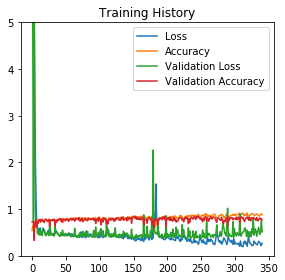

In [17]:
fig = plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training History')
plt.legend()
plt.ylim((0, 5))
plt.tight_layout()
plt.show()

In [18]:
row = data[(data['Team_team_one'] == 'Virginia') & (data['year_team_one'] == 2018)].drop(columns=cols_to_drop).to_numpy()

In [19]:
print (row.shape)

(1, 870)


In [20]:
prediction = model.predict_proba(x=row)

In [21]:
print (prediction)

[[0.6194241]]


In [22]:
predictions = model.predict_classes(x=data_np)
predictions = [int(x) for x in predictions]

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print (classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       329
           1       0.97      0.84      0.90       783

    accuracy                           0.87      1112
   macro avg       0.84      0.88      0.85      1112
weighted avg       0.89      0.87      0.87      1112



In [25]:
print (confusion_matrix(labels, predictions))

[[307  22]
 [128 655]]
